In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

C:\Users\WX847\Anaconda3\envs\learn_tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np

# train_data, test_data = imdb['train'], imdb['test']
train_data, test_data = imdb['train'].take(4000), imdb['test'].take(1000)

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [4]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [6]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 50
history_gru = model_gru.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 10s 3ms/sample - loss: 0.6928 - accuracy: 0.5180 - val_loss: 0.6900 - val_accuracy: 0.5450
Epoch 2/50
4000/4000 [==============================] - 3s 774us/sample - loss: 0.6246 - accuracy: 0.6645 - val_loss: 0.5800 - val_accuracy: 0.7060
Epoch 3/50
4000/4000 [==============================] - 3s 789us/sample - loss: 0.3237 - accuracy: 0.8668 - val_loss: 0.5121 - val_accuracy: 0.7750
Epoch 4/50
4000/4000 [==============================] - 3s 795us/sample - loss: 0.1232 - accuracy: 0.9563 - val_loss: 0.6193 - val_accuracy: 0.7830
Epoch 5/50
4000/4000 [==============================] - 3s 800us/sample - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.7251 - val_accuracy: 0.7580
Epoch 6/50
4000/4000 [==============================] - 3s 817us/sample - loss: 0.0179 - accuracy: 0.9950 - val_loss: 1.0878 - val_accuracy: 0.7420
Epoch 7/50
4000/4000 [==============================] - 3s 786us/

In [9]:
model_gru.save('GRU神经网络.h5')

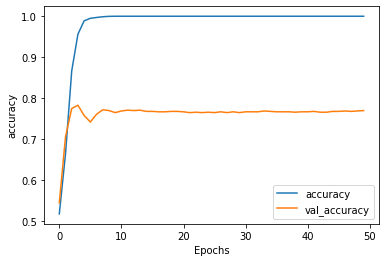

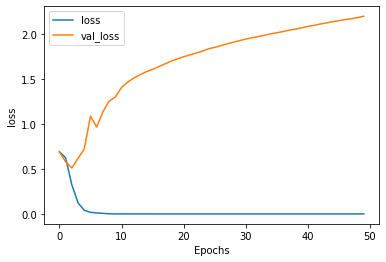

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

LSTM神经网络模型

In [12]:
# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 50
history_lstm = model_lstm.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 4s 974us/sample - loss: 0.6678 - accuracy: 0.5893 - val_loss: 0.6752 - val_accuracy: 0.5380
Epoch 2/50
4000/4000 [==============================] - 3s 859us/sample - loss: 0.6558 - accuracy: 0.6597 - val_loss: 0.6191 - val_accuracy: 0.7010
Epoch 3/50
4000/4000 [==============================] - 3s 867us/sample - loss: 0.5325 - accuracy: 0.7157 - val_loss: 0.5934 - val_accuracy: 0.7420
Epoch 4/50
4000/4000 [==============================] - 3s 866us/sample - loss: 0.5337 - accuracy: 0.7605 - val_loss: 0.7011 - val_accuracy: 0.5220
Epoch 5/50
4000/4000 [==============================] - 3s 848us/sample - loss: 0.6384 - accuracy: 0.6877 - val_loss: 0.6932 - val_accuracy: 0.6150
Epoch 6/50
4000/4000 [==============================] - 3s 867us/sample - loss: 0.4620 - accuracy: 0.8110 - val_loss: 0.6054 - val_accuracy: 0.7220
Epoch 7/50
4000/4000 [==============================] - 3s 846us

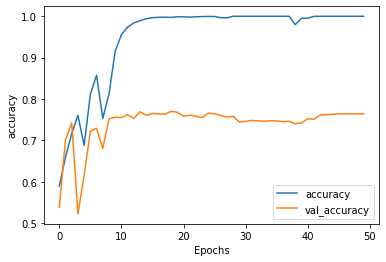

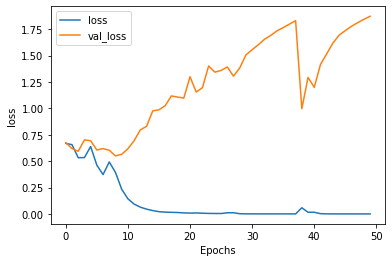

In [15]:
plot_graphs(history_lstm,'accuracy')
plot_graphs(history_lstm,'loss')

In [18]:
model_lstm.save('LSTM神经网络.h5')

卷积神经网络

In [16]:
# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_conv.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 50
history_conv = model_conv.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 559us/sample - loss: 0.6702 - accuracy: 0.5803 - val_loss: 0.5792 - val_accuracy: 0.7210
Epoch 2/50
4000/4000 [==============================] - 1s 250us/sample - loss: 0.3713 - accuracy: 0.8520 - val_loss: 0.4258 - val_accuracy: 0.8160
Epoch 3/50
4000/4000 [==============================] - 1s 256us/sample - loss: 0.1728 - accuracy: 0.9427 - val_loss: 0.4677 - val_accuracy: 0.8030
Epoch 4/50
4000/4000 [==============================] - 1s 268us/sample - loss: 0.0775 - accuracy: 0.9810 - val_loss: 0.5817 - val_accuracy: 0.7970
Epoch 5/50
4000/4000 [==============================] - 1s 274us/sample - loss: 0.0351 - accuracy: 0.9940 - val_loss: 0.6558 - val_accuracy: 0.7950
Epoch 6/50
4000/4000 [==============================] - 1s 249us/sample - loss: 0.0117 - accuracy: 0.9995 - val_loss: 0.7172 - val_accuracy: 0.7920
Epoch 7/50
4000/4000 [==============================] - 1s 257us

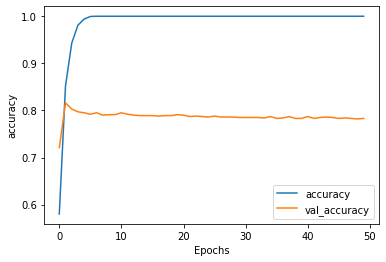

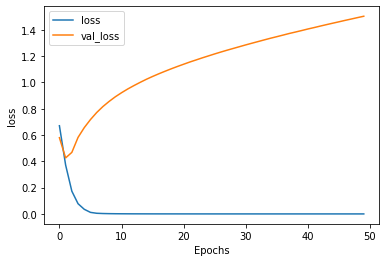

In [19]:
plot_graphs(history_conv,'accuracy')
plot_graphs(history_conv,'loss')

In [20]:
model_conv.save('卷积神经网络.h5')